In [241]:
from pyforest import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

In [242]:
df = pd.read_csv('C:/Users/abhishek/Downloads/Womens-Clothing-E-Commerce-Reviews.csv')

In [243]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [244]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses, but this one is no...
6        I aded this in my basket at hte last mintue to...
7        I ordered this in carbon for store pick up, an...
8        I love this dress. i usually get an xs but it ...
9        I'm 5"5' and 125 lbs. i ordered the s petite t...
10       Dress runs small esp where the zipper area run...
11       This dress is perfection! so pretty and flatte...
12       More and more i find myself reliant on the rev...
13       Bought the black xs to go under the larkspur m...
14       This is a nice choice for holiday gatherings. ...
15       I took these out of the package and wanted the...
16       Material and color is nice.  the leg opening i.

In [245]:
#to predict rating of women's clothing! -- its categorical!

In [246]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [247]:
df['Positive Feedback Count'].value_counts()

0      11176
1       4043
2       2193
3       1433
4        922
5        673
6        525
7        374
8        319
9        261
10       225
11       178
12       146
14       121
13       102
15        94
17        81
16        74
18        62
19        54
20        40
23        31
21        30
22        29
25        25
28        24
26        23
24        21
27        20
30        18
       ...  
49         2
46         2
55         2
58         2
66         1
50         1
64         1
94         1
48         1
98         1
78         1
82         1
59         1
93         1
69         1
87         1
71         1
54         1
89         1
108        1
117        1
122        1
77         1
84         1
68         1
52         1
56         1
61         1
99         1
95         1
Name: Positive Feedback Count, Length: 82, dtype: int64

In [248]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [250]:
df.replace()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [251]:
df.shape

(23486, 11)

In [252]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [253]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [254]:
df.drop('Title',axis=1,inplace=True)
df.drop('Review Text',axis=1,inplace=True)

In [255]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [256]:
df.rename(columns={"Clothing ID":'id'},inplace=True)
df.rename(columns={"Recommended IND":'Recommended_IND'},inplace=True)
df.rename(columns={"Positive Feedback Count":'Positive_Feedback_Count'},inplace=True)

df.rename(columns={"Division Name":'Division_Name'},inplace=True)

df.rename(columns={"Department Name":'Department_Name'},inplace=True)
df.rename(columns={"Class Name":'Class_Name'},inplace=True)


In [257]:
df.head()

,id,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1080,34,5,1,4,General,Dresses,Dresses
2,1077,60,3,0,0,General,Dresses,Dresses
3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,847,47,5,1,6,General,Tops,Blouses


In [258]:
#imputing missing values :_
df.isnull().sum()

id                          0
Age                         0
Rating                      0
Recommended_IND             0
Positive_Feedback_Count     0
Division_Name              14
Department_Name            14
Class_Name                 14
dtype: int64

In [259]:
df.corr()

,id,Age,Rating,Recommended_IND,Positive_Feedback_Count
id,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended_IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive_Feedback_Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


In [260]:
#lets do bivariate analysis!

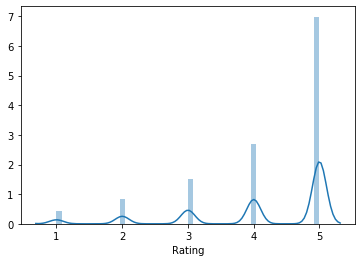

In [261]:
sns.distplot(df.Rating)

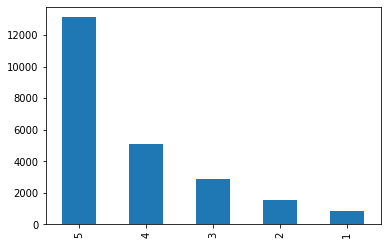

In [262]:
df.Rating.value_counts().plot(kind='bar')

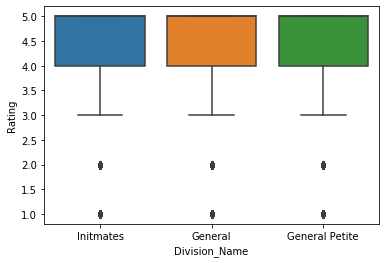

In [263]:
sns.boxplot(x='Division_Name',y='Rating',data=df)

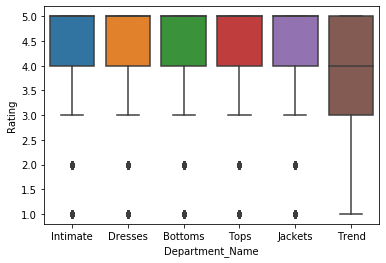

In [264]:
sns.boxplot(x='Department_Name',y='Rating',data=df)

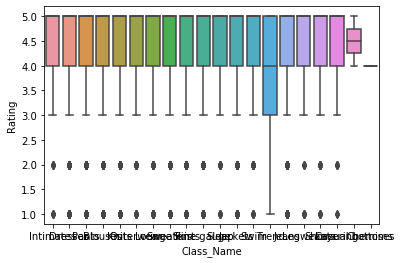

In [265]:
sns.boxplot(x='Class_Name',y='Rating',data=df)

In [266]:
df.Department_Name.value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department_Name, dtype: int64

In [267]:
df.Class_Name.value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class_Name, dtype: int64

In [268]:
df['Department_Name'].fillna('Tops',inplace=True)  #imputing missing values!
df['Division_Name'].fillna('General',inplace=True)
df['Class_Name'].fillna('Dresses',inplace=True)


In [269]:
df.Division_Name.value_counts()

General           13864
General Petite     8120
Initmates          1502
Name: Division_Name, dtype: int64

In [270]:
df.isnull().sum()

id                         0
Age                        0
Rating                     0
Recommended_IND            0
Positive_Feedback_Count    0
Division_Name              0
Department_Name            0
Class_Name                 0
dtype: int64

In [271]:
df.head()

,id,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1080,34,5,1,4,General,Dresses,Dresses
2,1077,60,3,0,0,General,Dresses,Dresses
3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,847,47,5,1,6,General,Tops,Blouses


In [272]:
#statistics!

In [273]:
df.drop("id",axis=1,inplace=True)

In [274]:
df.head()

,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,33,4,1,0,Initmates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses


In [275]:
#lets do stats to check which columns effect my target variable - rating ?

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 7 columns):
Age                        23486 non-null int64
Rating                     23486 non-null int64
Recommended_IND            23486 non-null int64
Positive_Feedback_Count    23486 non-null int64
Division_Name              23486 non-null object
Department_Name            23486 non-null object
Class_Name                 23486 non-null object
dtypes: int64(4), object(3)
memory usage: 1.3+ MB


In [277]:
df.head()

,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,33,4,1,0,Initmates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses


In [278]:
df['Rating']=df['Rating'].astype('category')

In [279]:
df.Rating.replace(to_replace=[1,2,3,4,5],value=['Poor','Below Average','Average','Good','Excellent'],inplace=True)


In [280]:
df.head()

,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,33,Good,1,0,Initmates,Intimate,Intimates
1,34,Excellent,1,4,General,Dresses,Dresses
2,60,Average,0,0,General,Dresses,Dresses
3,50,Excellent,1,0,General Petite,Bottoms,Pants
4,47,Excellent,1,6,General,Tops,Blouses


In [281]:
df.Rating.value_counts()

Excellent        13131
Good              5077
Average           2871
Below Average     1565
Poor               842
Name: Rating, dtype: int64

In [282]:
df['Rating']=df['Rating'].astype('category')

In [283]:
df.Rating.value_counts()

Excellent        13131
Good              5077
Average           2871
Below Average     1565
Poor               842
Name: Rating, dtype: int64

In [284]:
df.Rating.unique()

[Good, Excellent, Average, Below Average, Poor]
Categories (5, object): [Good, Excellent, Average, Below Average, Poor]

In [285]:
#stats:-

In [286]:
df.head()

,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,33,Good,1,0,Initmates,Intimate,Intimates
1,34,Excellent,1,4,General,Dresses,Dresses
2,60,Average,0,0,General,Dresses,Dresses
3,50,Excellent,1,0,General Petite,Bottoms,Pants
4,47,Excellent,1,6,General,Tops,Blouses


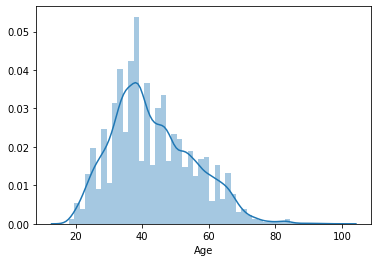

In [287]:
sns.distplot(df.Age)  #age is not normal -->hence non parametric --

In [288]:
ri=df[df['Rating']=='Poor']['Age']
rt=df[df['Rating']=='Below Average']['Age']
rr=df[df['Rating']=='Average']['Age']
rs=df[df['Rating']=='Good']['Age']
rp=df[df['Rating']=='Excellent']['Age']

from scipy.stats import kruskal
kruskal(ri,rt,rr,rs,rp)  #as we already know that age is not normal--we will do kruskal! (as the non parametric of one way annova!)

KruskalResult(statistic=35.026559771313565, pvalue=4.587357138961634e-07)

In [289]:
import scipy.stats as stats
ri=df[df['Rating']=='Poor']['Age']
rt=df[df['Rating']=='Below Average']['Age']
rr=df[df['Rating']=='Average']['Age']
rs=df[df['Rating']=='Good']['Age']
rp=df[df['Rating']=='Excellent']['Age']

from scipy.stats import f_oneway
stats.f_oneway(ri,rt,rr,rs,rp)  #as we already know that age is not normal--we will do kruskal! (as the non parametric of one way annova!)

F_onewayResult(statistic=10.403352338999655, pvalue=2.039937962206544e-08)

In [290]:
#age is a factor for determining rating!

In [291]:
df.Recommended_IND.value_counts()

1    19314
0     4172
Name: Recommended_IND, dtype: int64

In [292]:
df['Recommended_IND']=df['Recommended_IND'].astype('category')

In [293]:
from scipy.stats import chi2_contingency
table=pd.crosstab(index=df['Recommended_IND'],columns=df['Rating'])
table
chi2_contingency(table)

(16722.503172306748,
 0.0,
 4,
 array([[  509.99795623,   278.00306566,  2332.56118539,   901.86681427,
           149.57097846],
        [ 2361.00204377,  1286.99693434, 10798.43881461,  4175.13318573,
           692.42902154]]))

In [294]:
#recommended id important factor!

In [295]:
df.columns

Index(['Age', 'Rating', 'Recommended_IND', 'Positive_Feedback_Count',
       'Division_Name', 'Department_Name', 'Class_Name'],
      dtype='object')

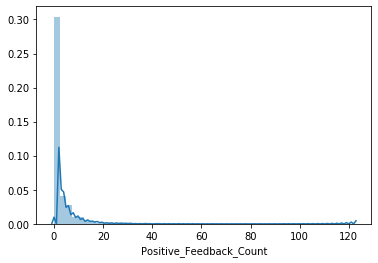

In [296]:
sns.distplot(df['Positive_Feedback_Count'])

In [297]:
import scipy.stats as stats
ri=df[df['Rating']=='Poor']['Positive_Feedback_Count']
rt=df[df['Rating']=='Below Average']['Positive_Feedback_Count']
rr=df[df['Rating']=='Average']['Positive_Feedback_Count']
rs=df[df['Rating']=='Good']['Positive_Feedback_Count']
rp=df[df['Rating']=='Excellent']['Positive_Feedback_Count']

from scipy.stats import f_oneway
stats.f_oneway(ri,rt,rr,rs,rp)  #as we already know that age is not normal--we will do kruskal! (as the non parametric of one way annova!)

F_onewayResult(statistic=27.6479424546575, pvalue=6.168085632594908e-23)

In [298]:
#effects target!

In [299]:
df.columns

Index(['Age', 'Rating', 'Recommended_IND', 'Positive_Feedback_Count',
       'Division_Name', 'Department_Name', 'Class_Name'],
      dtype='object')

In [300]:
from scipy.stats import chi2_contingency
table=pd.crosstab(index=df['Division_Name'],columns=df['Rating'])
table
chi2_contingency(table)

(25.61162201548986,
 0.00122362617021498,
 8,
 array([[1694.77748446,  923.83377331, 7751.34905901, 2996.9994039 ,
          497.04027932],
        [ 992.61347186,  541.07979222, 4539.88418632, 1755.31124925,
          291.11130035],
        [ 183.60904369,  100.08643447,  839.76675466,  324.68934684,
           53.84842034]]))

In [301]:
from scipy.stats import chi2_contingency
table=pd.crosstab(index=df['Department_Name'],columns=df['Rating'])
table
chi2_contingency(table)

(103.88511613611084,
 2.524704386217501e-13,
 20,
 array([[4.64401303e+02, 2.53148046e+02, 2.12401724e+03, 8.21234906e+02,
         1.36198501e+02],
        [7.72453760e+02, 4.21069360e+02, 3.53294682e+03, 1.36598667e+03,
         2.26543388e+02],
        [2.12091672e+02, 1.15612493e+02, 9.70036830e+02, 3.75057268e+02,
         6.22017372e+01],
        [1.26154816e+02, 6.87677765e+01, 5.76990207e+02, 2.23088819e+02,
         3.69983820e+01],
        [1.28135153e+03, 6.98472707e+02, 5.86047611e+03, 2.26590795e+03,
         3.75791706e+02],
        [1.45469216e+01, 7.92961764e+00, 6.65327855e+01, 2.57243890e+01,
         4.26628630e+00]]))

In [302]:
from scipy.stats import chi2_contingency
table=pd.crosstab(index=df['Class_Name'],columns=df['Rating'])
table
chi2_contingency(table)

(182.21569162626335,
 1.0431256575323607e-10,
 76,
 array([[3.78586690e+02, 2.06369965e+02, 1.73152972e+03, 6.69482628e+02,
         1.11030997e+02],
        [2.44486077e-01, 1.33270885e-01, 1.11819808e+00, 4.32342672e-01,
         7.17022907e-02],
        [1.22243038e-01, 6.66354424e-02, 5.59099038e-01, 2.16171336e-01,
         3.58511454e-02],
        [7.74165162e+02, 4.22002257e+02, 3.54077421e+03, 1.36901307e+03,
         2.27045304e+02],
        [1.34467342e+02, 7.32989866e+01, 6.15008941e+02, 2.37788470e+02,
         3.94362599e+01],
        [1.88254279e+01, 1.02618581e+01, 8.61012518e+01, 3.32903858e+01,
         5.52107639e+00],
        [8.60590990e+01, 4.69113514e+01, 3.93605723e+02, 1.52184621e+02,
         2.52392063e+01],
        [1.40212765e+02, 7.64308524e+01, 6.41286596e+02, 2.47948523e+02,
         4.11212637e+01],
        [5.92023035e+02, 3.22715448e+02, 2.70771664e+03, 1.04691778e+03,
         1.73627097e+02],
        [1.78474836e+01, 9.72877459e+00, 8.16284595e+01, 3

In [304]:
df.head()

,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,33,Good,1,0,Initmates,Intimate,Intimates
1,34,Excellent,1,4,General,Dresses,Dresses
2,60,Average,0,0,General,Dresses,Dresses
3,50,Excellent,1,0,General Petite,Bottoms,Pants
4,47,Excellent,1,6,General,Tops,Blouses


In [306]:
t=pd.get_dummies(x)

In [308]:
t.head()

,Age,Positive_Feedback_Count,Recommended_IND_0,Recommended_IND_1,Division_Name_General,Division_Name_General Petite,Division_Name_Initmates,Department_Name_Bottoms,Department_Name_Dresses,Department_Name_Intimate,...,Class_Name_Legwear,Class_Name_Lounge,Class_Name_Outerwear,Class_Name_Pants,Class_Name_Shorts,Class_Name_Skirts,Class_Name_Sleep,Class_Name_Sweaters,Class_Name_Swim,Class_Name_Trend
0,33,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,34,4,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,60,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,50,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,47,6,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [310]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(t,y,test_size=0.20,random_state=12) 
#random state 

In [311]:
pred = rf.fit(xtrain,ytrain).predict(xtest)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [312]:
rf.feature_importances_

array([4.58071656e-01, 2.04802068e-01, 1.02656874e-01, 1.92375692e-01,
       3.75565397e-03, 3.60914058e-03, 9.15680957e-04, 1.60992937e-03,
       1.29118011e-03, 6.39618423e-04, 1.15203212e-03, 1.92095006e-03,
       6.09385194e-04, 2.83294235e-03, 1.95869309e-05, 1.65052978e-04,
       1.11504796e-03, 2.39043377e-03, 7.05738883e-04, 1.48652426e-03,
       1.45614746e-03, 2.86272991e-03, 7.42911551e-04, 1.01485383e-03,
       1.24565069e-03, 1.34884638e-03, 1.72253977e-03, 7.67992309e-04,
       1.57163703e-03, 1.14010223e-03, 2.48849237e-03, 8.64558794e-04,
       6.48349871e-04])

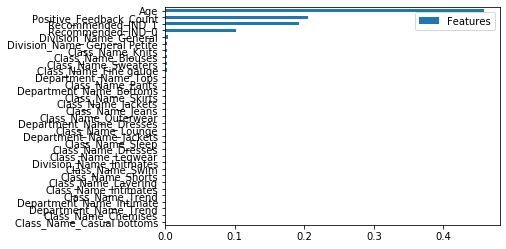

In [314]:
pd.DataFrame(rf.feature_importances_,index=xtest.columns,
            columns=["Features"]).sort_values(by="Features").plot(kind="barh")

In [315]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score

In [316]:
accuracy_score(ytest,pred)    

0.5555555555555556

In [317]:
confusion_matrix(ytest,pred) 

array([[ 165,  130,  201,   42,   45],
       [ 117,  117,   13,    6,   46],
       [  68,   13, 2142,  364,    1],
       [  40,   19,  832,  150,   12],
       [  70,   60,    5,    4,   36]], dtype=int64)

In [318]:
cohen_kappa_score(ytest,pred)

0.23469588609671288

In [319]:
pred

array(['Excellent', 'Excellent', 'Excellent', ..., 'Excellent',
       'Excellent', 'Excellent'], dtype=object)